In [44]:
import h5py
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [46]:
x = np.zeros((24400,22))
counter = 0

with h5py.File('input/simulation_data_cutoff_normal.hdf5','r') as sim_data:
    for nstudies in range(10,150):
        
        for rep in range(100):
            x[counter,0] = nstudies

            nsub = sim_data[f'{nstudies}/{rep}/nsub'][:]
            x[counter,1] = np.sum(nsub)
            x[counter,2] = np.mean(nsub)
            x[counter,3] = np.median(nsub)
            x[counter,4] = np.std(nsub)
            x[counter,5] = np.max(nsub)
            x[counter,6] = np.min(nsub)
            #x[counter,15] = skew(nfoci)
            #x[counter,16] = kurtosis(nfoci)
            
            nfoci = sim_data[f'{nstudies}/{rep}/nfoci'][:]
            x[counter,7] = np.sum(nfoci)
            x[counter,8] = np.mean(nfoci)
            x[counter,9] = np.median(nfoci)
            x[counter,10] = np.std(nfoci)
            x[counter,11] = np.max(nfoci)
            x[counter,12] = np.min(nfoci)
            #x[counter,7] = skew(nfoci)
            #x[counter,8] = kurtosis(nfoci)

            x[counter,13]= np.mean(nfoci / nsub)
            x[counter,14] = np.std(nfoci / nsub)
            x[counter,15] = np.max(nfoci / nsub)
            x[counter,16] = np.min(nfoci / nsub)

            x[counter,17] = np.sum(nfoci) / nstudies

            hi_foci_counter = 0
            mi_foci_counter = 0
            li_foci_counter = 0
            vi_foci_counter = 0



            for i in range(nstudies):
                if nsub[i] > 20:
                    hi_foci_counter += nfoci[i]
                if (nsub[i] < 20) and (nsub[i] > 15):
                    mi_foci_counter += nfoci[i]
                if (nsub[i] < 15) and (nsub[i] > 10):
                    li_foci_counter += nfoci[i]
                if nsub[i] < 10:
                    vi_foci_counter += nfoci[i]

            x[counter,18] = hi_foci_counter
            x[counter,19] = mi_foci_counter
            x[counter,20] = li_foci_counter
            x[counter,21] = vi_foci_counter


            counter += 1

            
with h5py.File('input/simulation_data_cutoff_uniform.hdf5','r') as sim_data:
    for nstudies in range(10,100):
        for rep in range(100):
            x[counter,0] = nstudies

            nsub = sim_data[f'{nstudies}/{rep}/nsub'][:]
            x[counter,1] = np.sum(nsub)
            x[counter,2] = np.mean(nsub)
            x[counter,3] = np.median(nsub)
            x[counter,4] = np.std(nsub)
            x[counter,5] = np.max(nsub)
            x[counter,6] = np.min(nsub)
            #x[counter,15] = skew(nfoci)
            #x[counter,16] = kurtosis(nfoci)
            
            nfoci = sim_data[f'{nstudies}/{rep}/nfoci'][:]
            x[counter,7] = np.sum(nfoci)
            x[counter,8] = np.mean(nfoci)
            x[counter,9] = np.median(nfoci)
            x[counter,10] = np.std(nfoci)
            x[counter,11] = np.max(nfoci)
            x[counter,12] = np.min(nfoci)
            #x[counter,7] = skew(nfoci)
            #x[counter,8] = kurtosis(nfoci)

            x[counter,13]= np.mean(nfoci / nsub)
            x[counter,14] = np.std(nfoci / nsub)
            x[counter,15] = np.max(nfoci / nsub)
            x[counter,16] = np.min(nfoci / nsub)

            x[counter,17] = np.sum(nfoci) / nstudies

            hi_foci_counter = 0
            mi_foci_counter = 0
            li_foci_counter = 0
            vi_foci_counter = 0



            for i in range(nstudies):
                if nsub[i] > 20:
                    hi_foci_counter += nfoci[i]
                if (nsub[i] < 20) and (nsub[i] > 15):
                    mi_foci_counter += nfoci[i]
                if (nsub[i] < 15) and (nsub[i] > 10):
                    li_foci_counter += nfoci[i]
                if nsub[i] < 10:
                    vi_foci_counter += nfoci[i]

            x[counter,18] = hi_foci_counter
            x[counter,19] = mi_foci_counter
            x[counter,20] = li_foci_counter
            x[counter,21] = vi_foci_counter


            counter += 1
            

            
with h5py.File('input/simulation_data_cutoff_highfoci.hdf5','r') as sim_data:
    for nstudies in range(10,150):
        for rep in range(10):
            x[counter,0] = nstudies

            nsub = sim_data[f'{nstudies}/{rep}/nsub'][:]
            x[counter,1] = np.sum(nsub)
            x[counter,2] = np.mean(nsub)
            x[counter,3] = np.median(nsub)
            x[counter,4] = np.std(nsub)
            x[counter,5] = np.max(nsub)
            x[counter,6] = np.min(nsub)
            #x[counter,15] = skew(nfoci)
            #x[counter,16] = kurtosis(nfoci)
            
            nfoci = sim_data[f'{nstudies}/{rep}/nfoci'][:]
            x[counter,7] = np.sum(nfoci)
            x[counter,8] = np.mean(nfoci)
            x[counter,9] = np.median(nfoci)
            x[counter,10] = np.std(nfoci)
            x[counter,11] = np.max(nfoci)
            x[counter,12] = np.min(nfoci)
            #x[counter,7] = skew(nfoci)
            #x[counter,8] = kurtosis(nfoci)

            x[counter,13]= np.mean(nfoci / nsub)
            x[counter,14] = np.std(nfoci / nsub)
            x[counter,15] = np.max(nfoci / nsub)
            x[counter,16] = np.min(nfoci / nsub)

            x[counter,17] = np.sum(nfoci) / nstudies

            hi_foci_counter = 0
            mi_foci_counter = 0
            li_foci_counter = 0
            vi_foci_counter = 0



            for i in range(nstudies):
                if nsub[i] > 20:
                    hi_foci_counter += nfoci[i]
                if (nsub[i] < 20) and (nsub[i] > 15):
                    mi_foci_counter += nfoci[i]
                if (nsub[i] < 15) and (nsub[i] > 10):
                    li_foci_counter += nfoci[i]
                if nsub[i] < 10:
                    vi_foci_counter += nfoci[i]

            x[counter,18] = hi_foci_counter
            x[counter,19] = mi_foci_counter
            x[counter,20] = li_foci_counter
            x[counter,21] = vi_foci_counter


            counter += 1


In [47]:
tfce_cutoffs = np.empty((0))

with h5py.File(f'input/tfce_nulls_normal.hdf5', 'r') as f:
    for nstudies in range(10,150):
        tfce_cutoffs = np.append(tfce_cutoffs, f[f'{nstudies}'][:])

with h5py.File(f'input/tfce_nulls_uniform.hdf5', 'r') as f:
    for nstudies in range(10,100):
        tfce_cutoffs = np.append(tfce_cutoffs, f[f'{nstudies}'][:])
            
with h5py.File(f'input/tfce_nulls_highfoci.hdf5', 'r') as f:
    for nstudies in range(10,150):
        tfce_cutoffs = np.append(tfce_cutoffs, f[f'{nstudies}'][:])

In [48]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [49]:
x, tfce_cutoffs = unison_shuffled_copies(x, tfce_cutoffs)

In [50]:
xgb_tfce = xgb.XGBRegressor(n_jobs=6)
#cv_dict = cross_validate(xgb_tfce, x, tfce_cutoffs, cv=10, scoring=['r2', 'neg_mean_absolute_error'])

In [51]:
xgb_tfce = xgb_tfce.fit(x, tfce_cutoffs)

In [52]:
X_real = pd.read_csv('output/x_real.csv')
tfce_real = X_real['t_cutoff'].values

In [53]:
tfce_predict_xgb = []

for idx, row in X_real.iterrows():
    tfce_predict_xgb.append(xgb_tfce.predict(row[4:].values.reshape(1,22))[0])

r2_tfce = np.round(r2_score(tfce_real, tfce_predict_xgb), 3)
r2_tfce

0.965

Text(0.5, 0, 'Permutation Result')

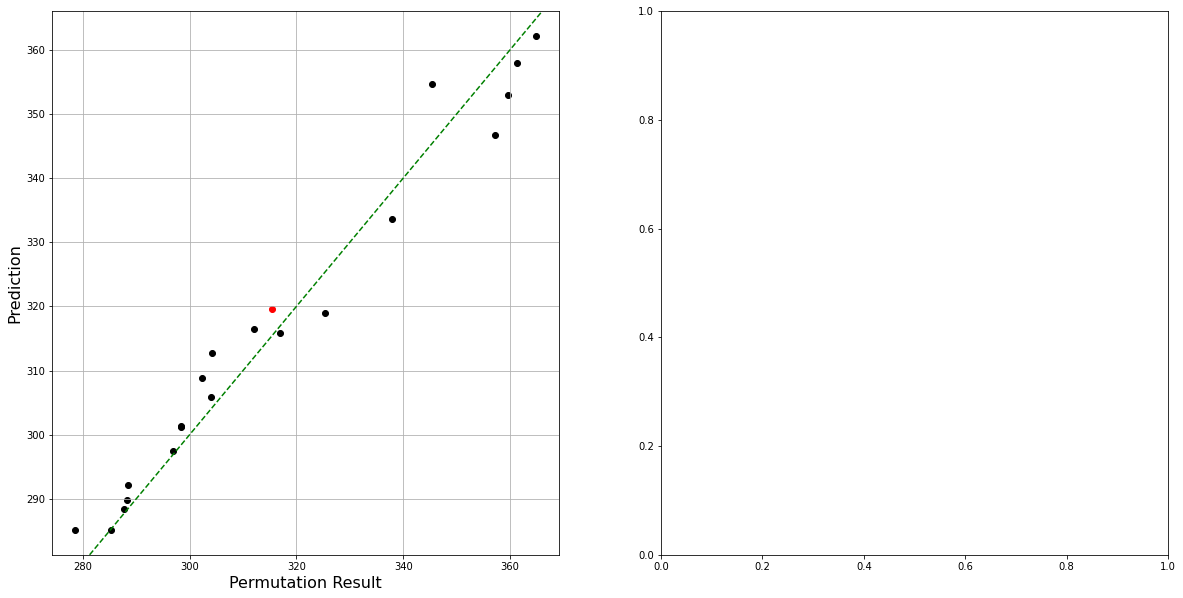

In [54]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

for i in range(len(tfce_real)):
    if i == 16:
         ax[0].scatter(tfce_real[i],np.array(tfce_predict_xgb)[i], color='red')
    else:
        ax[0].scatter(tfce_real[i],np.array(tfce_predict_xgb)[i], color='black')
add_identity(ax[0], color='green', ls='--')
ax[0].grid()
ax[0].set_ylabel('Prediction', fontsize=16)
ax[0].set_xlabel('Permutation Result', fontsize=16)